In [ ]:
P

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For machine learning models and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Loading the dataset

import pandas as pd

column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

df = pd.read_csv("House_Prediction_Dataset.csv", delim_whitespace=True, names=column_names)

C:\Users\Awuni Bismark\AppData\Local\Temp\ipykernel_12504\3496275081.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("House_Prediction_Dataset.csv", delim_whitespace=True, names=column_names)


In [3]:
# Preview data
print("First 5 rows of the dataset:")
print(df.head)


First 5 rows of the dataset:
<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0   

In [4]:
# Dataset info
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [5]:
# Descriptive statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std   

## Data Preprocessing

In [6]:
# Splitting into training and testing sets (80% train, 20% test)

from sklearn.model_selection import train_test_split

# Separating features (X) and target (y)
X = df.drop(columns=["MEDV"])   # all columns except the target
y = df["MEDV"]                  # target variable


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (404, 13)
Testing set shape: (102, 13)


In [7]:
# Scaling features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Data has been successfully split and scaled.")


✅ Data has been successfully split and scaled.


In [8]:
# Training a Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [9]:
# Predicting on test set
y_pred_lr = lin_reg.predict(X_test_scaled)

In [10]:
# Evaluating performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R²): {r2_lr:.3f}")

Linear Regression Performance:
Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93
R-squared (R²): 0.669


In [11]:
# Training a Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [12]:
# Predicting on test set
y_pred_tree = tree_reg.predict(X_test_scaled)

In [13]:
# Evaluating performance
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree:.2f}")
print(f"R-squared (R²): {r2_tree:.3f}")

Decision Tree Regression Performance:
Mean Squared Error (MSE): 10.42
Root Mean Squared Error (RMSE): 3.23
R-squared (R²): 0.858


In [14]:
# Training a Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Initialize and train model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Predicting on test set
y_pred_rf = rf_reg.predict(X_test_scaled)


In [16]:
# Evaluating performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.3f}")

Random Forest Regression Performance:
Mean Squared Error (MSE): 7.84
Root Mean Squared Error (RMSE): 2.80
R-squared (R²): 0.893


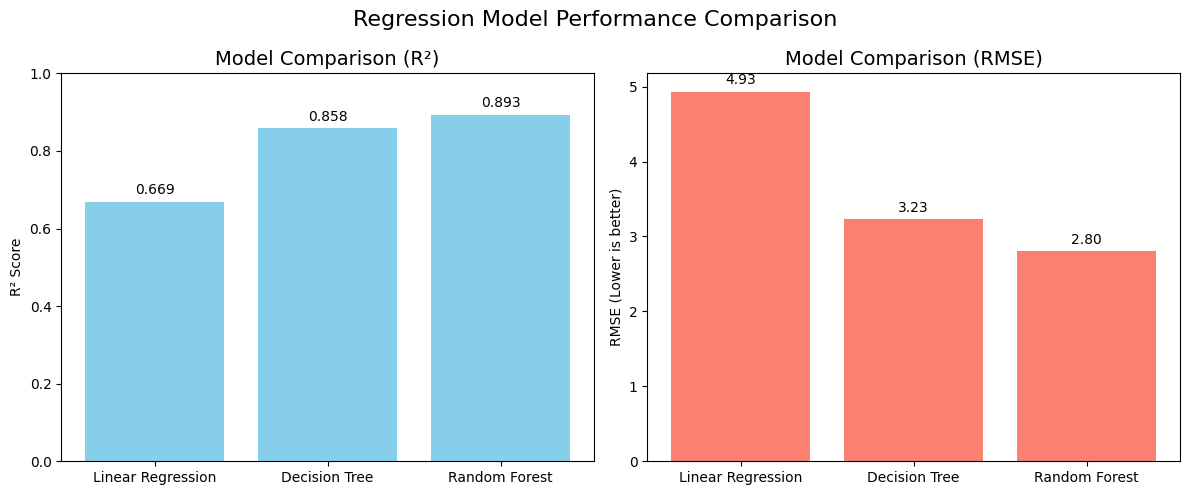

In [17]:
# Visualizing Model Performance

import matplotlib.pyplot as plt

# Model names and performance metrics
models = ["Linear Regression", "Decision Tree", "Random Forest"]
r2_scores = [0.669, 0.858, 0.893]
rmse_scores = [4.93, 3.23, 2.80]

# Creating two subplots: one for R², one for RMSE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for R²
ax[0].bar(models, r2_scores, color="skyblue")
ax[0].set_title("Model Comparison (R²)", fontsize=14)
ax[0].set_ylabel("R² Score")
ax[0].set_ylim(0, 1)
for i, v in enumerate(r2_scores):
    ax[0].text(i, v + 0.02, f"{v:.3f}", ha="center", fontsize=10)

# Bar chart for RMSE
ax[1].bar(models, rmse_scores, color="salmon")
ax[1].set_title("Model Comparison (RMSE)", fontsize=14)
ax[1].set_ylabel("RMSE (Lower is better)")
for i, v in enumerate(rmse_scores):
    ax[1].text(i, v + 0.1, f"{v:.2f}", ha="center", fontsize=10)

plt.suptitle("Regression Model Performance Comparison", fontsize=16)
plt.tight_layout()
plt.show()

## Interpretation

#### Linear Regression

#### R² = 0.669 → explains ~67% of the variance in house prices.
#### MSE and RMSE are relatively high — meaning the model underfits a bit (too simple).

#### Decision Tree

#### R² = 0.858 → much better fit.
#### The model learns nonlinear relationships well.
#### However, decision trees can overfit if not pruned or tuned.

#### Random Forest

#### R² = 0.893 → explains ~89% of the variance.
#### Lowest error values (MSE, RMSE).

#### The Random Forest Regressor was the most effective model for predicting house prices, outperforming both Linear Regression and Decision Tree models.